# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,
}



font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})



/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=34062) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


# Compute halo mass function

In [2]:
%%time 
M = Class()
M.set(cosmo_params)
params = {
        'output': 'dndlnM',
        # mass function
        'mass_function' : 'T08M200m',
        #integration precision settings
        'ndim_redshifts' :80,
        #redshift and mass bounds
        'z_min' : 0.,
        'z_max' : 3.,
        'M_min' : 1e10,
        'M_max' : 3.5e15,
        # 'cosmo_model': 0,
    
}
M.set(params)
M.compute_class_szfast()

/Users/licongxu/envs/jax_env/lib/python3.12/site-packages/IPython/core/magics/execution.py:1355: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  out = eval(code_2, glob, local_ns)


CPU times: user 3.15 s, sys: 410 ms, total: 3.56 s
Wall time: 441 ms


/Users/licongxu/envs/jax_env/lib/python3.12/site-packages/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


In [3]:
z = 0.
print(M.pk_lin(1.,z))
z = 1.
print(M.pk_lin(1.,z))

86.81763360030749
32.18256626141982


In [4]:
m_arr = np.geomspace(params['M_min'],params['M_max'],500)
dndlnm = np.vectorize(M.get_dndlnM_at_z_and_M)
sigma = np.vectorize(M.get_sigma_at_z_and_m)
nu = np.vectorize(M.get_nu_at_z_and_m)
b1 = np.vectorize(M.get_first_order_bias_at_z_and_nu)
b2 = np.vectorize(M.get_second_order_bias_at_z_and_nu)

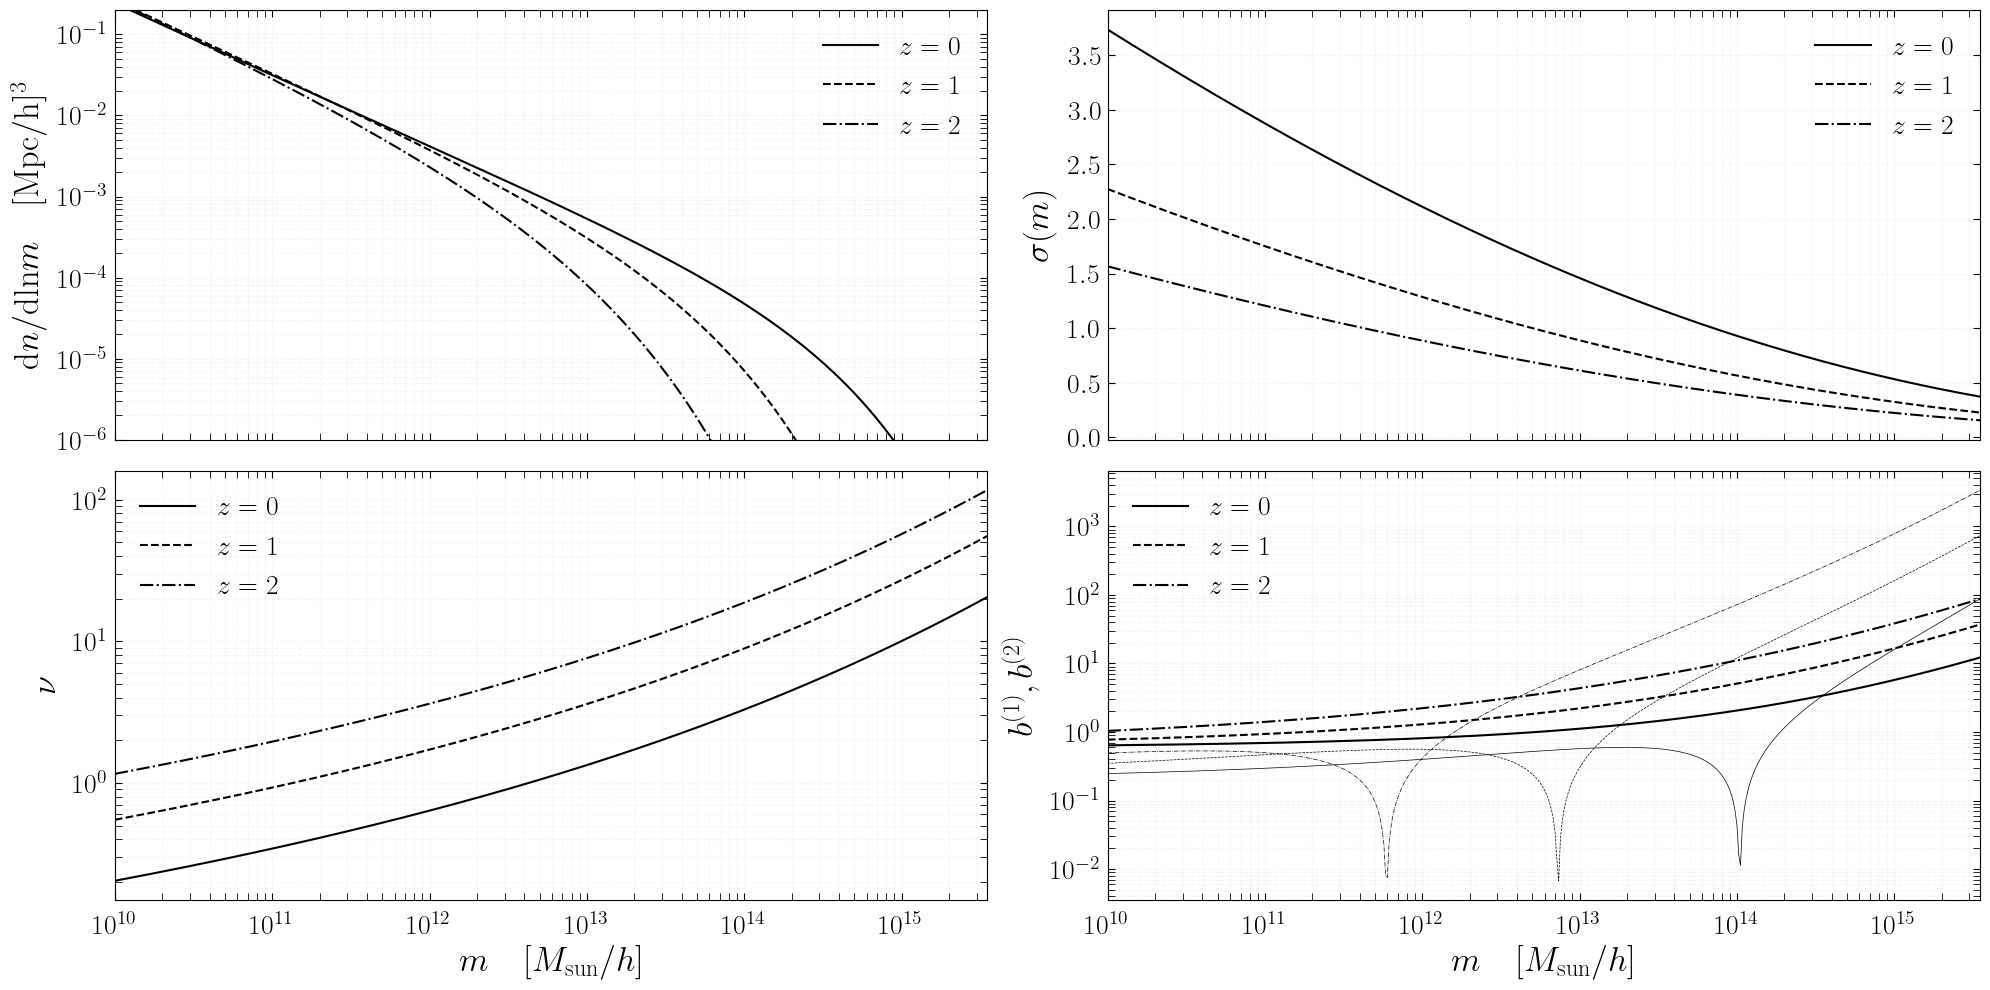

In [5]:

label_size = 20
title_size = 25
legend_size = 13
handle_length = 1.5
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10),sharex=True)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

# ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\mathrm{d}n/\mathrm{dln} m\quad[\mathrm{Mpc/h}]^3$',size=title_size,labelpad=8)

z = 0.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
z = 1.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
z = 2.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')

ax.loglog()

ax.set_ylim(1e-6,2e-1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=1,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=0$')

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

# ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\sigma(m)$',size=title_size,labelpad=8)

z = 0.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
z = 1.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
z = 2.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')


ax.set_xscale('log')
# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=1,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=1$')

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\nu$',size=title_size,labelpad=8)


z = 0.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
z = 1.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
z = 2.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')

ax.loglog()

# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=2,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=2$')

ax = ax4
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$b^{(1)}, b^{(2)}$',size=title_size,labelpad=8)


z = 0.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',lw=0.5)
z = 1.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',ls='--',lw=0.5)
z = 2.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',ls='-.',lw=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])
ax.legend(loc=2,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=2$')




fig.tight_layout()
# plt.savefig('figures/hmf.pdf')

# Compare Tinker08 and Tinker10

In [6]:
%%time 
MT10 = Class()
MT10.set(cosmo_params)
params = {
        'output': 'dndlnM',
        # mass function
        'mass_function' : 'T10M200m',
        #integration precision settings
        'ndim_redshifts' :80,
        #redshift and mass bounds
        'z_min' : 0.,
        'z_max' : 3.,
        'M_min' : 1e10,
        'M_max' : 1e15,
    
        'skip_cmb':1,
        'skip_pknl':1
}
MT10.set(params)
MT10.compute_class_szfast()

/Users/licongxu/envs/jax_env/lib/python3.12/site-packages/IPython/core/magics/execution.py:1355: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  out = eval(code_2, glob, local_ns)


CPU times: user 2.31 s, sys: 468 ms, total: 2.78 s
Wall time: 356 ms


/Users/licongxu/envs/jax_env/lib/python3.12/site-packages/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


In [7]:
z = 0.
print(MT10.pk_lin(1.,z))
z = 1.
print(MT10.pk_lin(1.,z))

86.81763360030749
32.18256626141982


In [8]:
m_arr = np.geomspace(params['M_min'],params['M_max'],500)
dndlnmT10 = np.vectorize(MT10.get_dndlnM_at_z_and_M)
sigmaT10 = np.vectorize(MT10.get_sigma_at_z_and_m)
nuT10 = np.vectorize(MT10.get_nu_at_z_and_m)
b1T10 = np.vectorize(MT10.get_first_order_bias_at_z_and_nu)
b2T10 = np.vectorize(MT10.get_second_order_bias_at_z_and_nu)

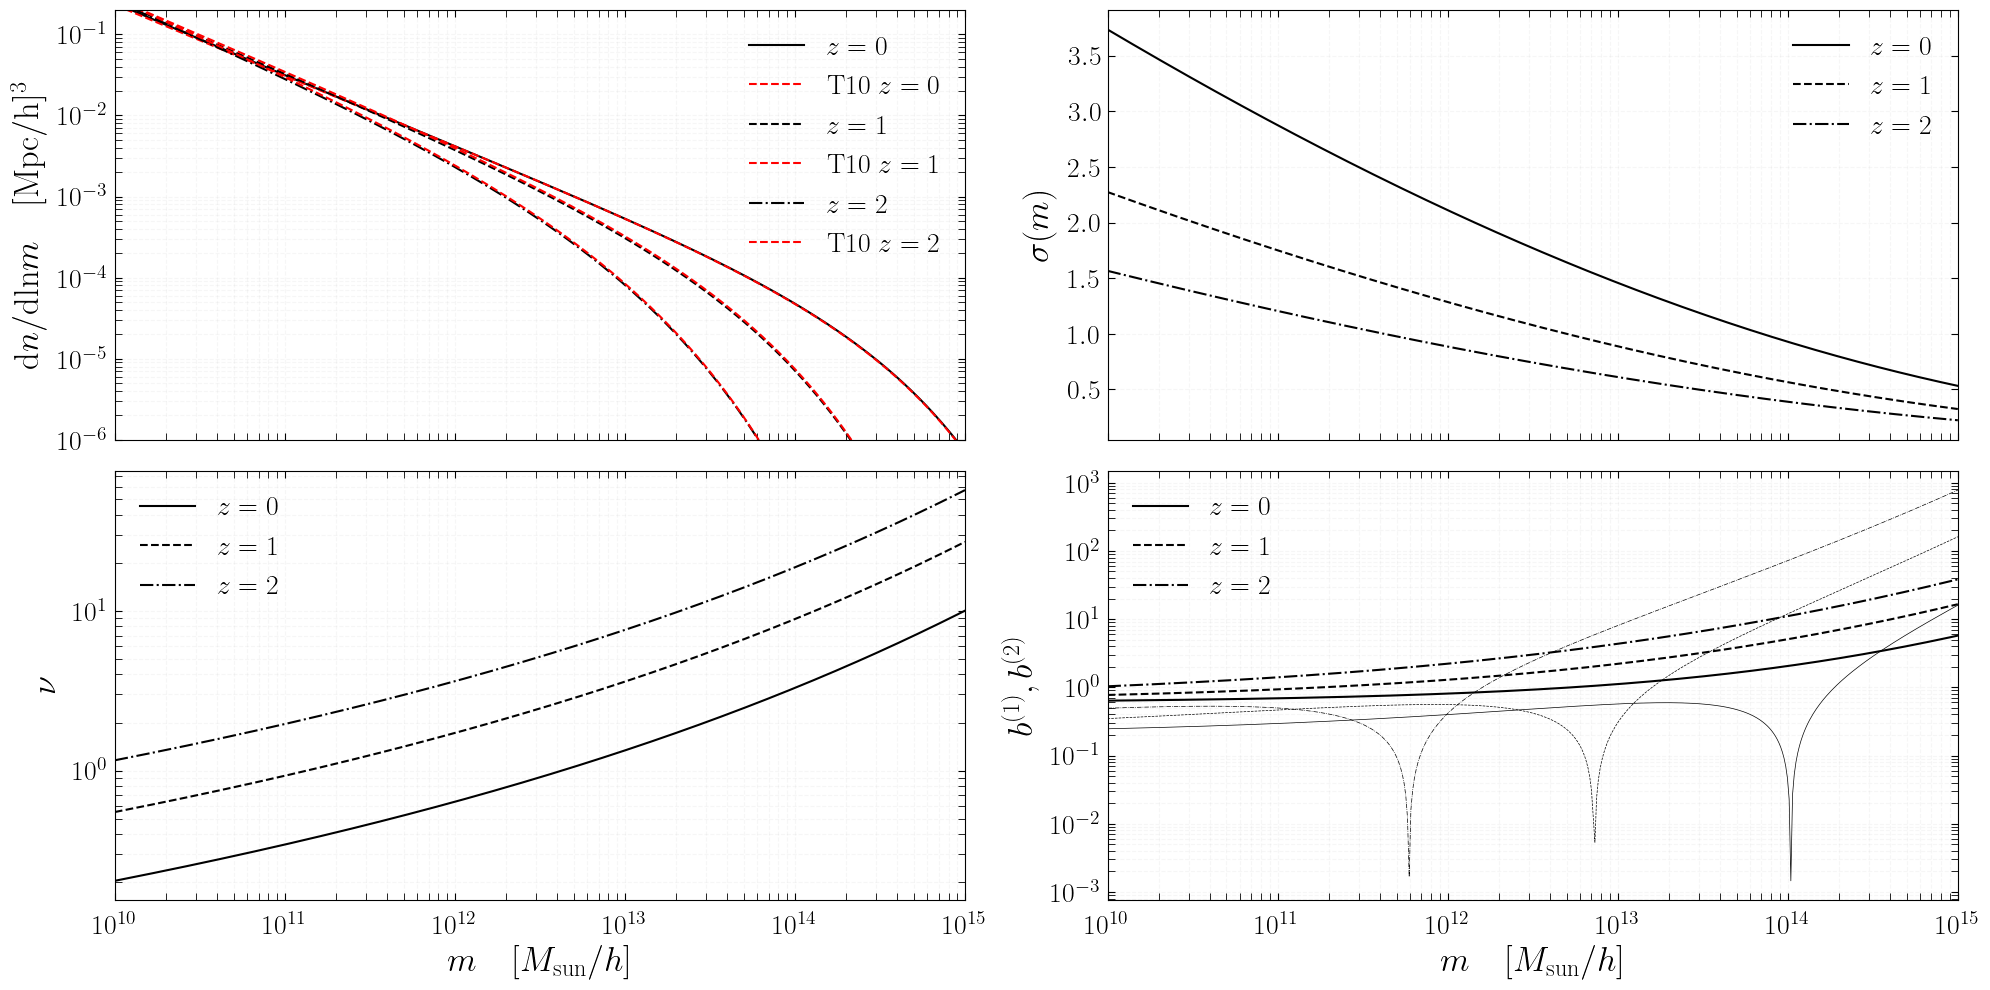

In [9]:

label_size = 20
title_size = 25
legend_size = 13
handle_length = 1.5
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10),sharex=True)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

# ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\mathrm{d}n/\mathrm{dln} m\quad[\mathrm{Mpc/h}]^3$',size=title_size,labelpad=8)

z = 0.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
ax.plot(m_arr,dndlnmT10(z,m_arr),label=r'$\mathrm{T10}$ $z=%.0f$'%z,alpha=1.,c='r',ls='--')
z = 1.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
ax.plot(m_arr,dndlnmT10(z,m_arr),label=r'$\mathrm{T10}$ $z=%.0f$'%z,alpha=1.,c='r',ls='--')
z = 2.
ax.plot(m_arr,dndlnm(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')
ax.plot(m_arr,dndlnmT10(z,m_arr),label=r'$\mathrm{T10}$ $z=%.0f$'%z,alpha=1.,c='r',ls='--')

ax.loglog()

ax.set_ylim(1e-6,2e-1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=1,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=0$')

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

# ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\sigma(m)$',size=title_size,labelpad=8)

z = 0.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
z = 1.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
z = 2.
ax.plot(m_arr,sigma(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')


ax.set_xscale('log')
# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=1,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=1$')

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$\nu$',size=title_size,labelpad=8)


z = 0.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k')
z = 1.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
z = 2.
ax.plot(m_arr,nu(z,m_arr),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')

ax.loglog()

# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])

ax.legend(loc=2,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=2$')

ax = ax4
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_xlabel(r'$m\quad[M_\mathrm{sun}/h]$',size=title_size)
ax.set_ylabel(r'$b^{(1)}, b^{(2)}$',size=title_size,labelpad=8)


z = 0.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',lw=0.5)
z = 1.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='--')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',ls='--',lw=0.5)
z = 2.
ax.plot(m_arr,b1(z,nu(z,m_arr)),label=r'$z=%.0f$'%z,alpha=1.,c='k',ls='-.')
ax.plot(m_arr,np.abs(b2(z,nu(z,m_arr))),alpha=1.,c='k',ls='-.',lw=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_ylim(1e1,1e5)
# ax.set_xlim(2e-3,1e1)
ax.set_xlim(params['M_min'],params['M_max'])
ax.legend(loc=2,frameon=False,framealpha=1,fontsize=20)

# ax.set_title(r'$z=2$')




fig.tight_layout()
# plt.savefig('figures/hmf.pdf')

# Compute with Jax


In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from classy_sz import Class as Class_sz
import jax.numpy as jnp
import jax
import mcfit
from mcfit import TophatVar
import jax.scipy as jscipy

In [11]:
%%time
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,
}

# initialize computation
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':'mPk',
'jax': 1,
# 'ndim_redshifts':50,
# 'skip_background_and_thermo': 0,
## don't forget to set neutrinos if you want to compare with full background sol
# 'N_ncdm': 1,
# 'm_ncdm': 0.02,
# 'deg_ncdm': 3,
# 'cosmo_model':0,
'M_min': 1e10,
'M_max': 3.5e15
})
classy_sz.compute_class_szfast()
# classy_sz.compute()

CPU times: user 4.11 s, sys: 801 ms, total: 4.91 s
Wall time: 1.56 s


In [12]:
classy_sz.get_all_relevant_params()

{'output': 'mPk',
 'skip_input': 0,
 'skip_background_and_thermo': 0,
 'skip_pknl': 0,
 'skip_pkl': 0,
 'skip_chi': 1,
 'skip_hubble': 1,
 'skip_class_sz': 1,
 'skip_sigma8_at_z': 1,
 'skip_sigma8_and_der': 0,
 'skip_cmb': 1,
 'cosmo_model': 0,
 'jax': 1,
 'classy_sz_verbose': 'none',
 'non_linear': 'hmcode',
 'ndim_masses': 500,
 'ndim_redshifts': 100,
 'sBBN file': '/Users/licongxu/class_sz_data_directory/class_sz/class-sz//bbn/sBBN_2017.dat',
 'A10_file': '/Users/licongxu/class_sz_data_directory/class_sz/class-sz//class_sz_auxiliary_files/includes/class_sz_lnIgnfw-and-d2lnIgnfw-vs-lnell-over-ell500_A10.txt',
 'P13_file': '/Users/licongxu/class_sz_data_directory/class_sz/class-sz//class_sz_auxiliary_files/includes/class_sz_lnIgnfw-and-d2lnIgnfw-vs-lnell-over-ell500_P13.txt',
 'Tinker_et_al_10_alpha_consistency_msyriac_file': '/Users/licongxu/class_sz_data_directory/class_sz/class-sz//class_sz_auxiliary_files/includes/Tinker_et_al_10_alpha_consistency_msyriac.txt',
 'full_path_to_dndz

In [13]:
def MF_T08(sigmas, z, delta_mean):
    # Convert delta_mean to log scale
    delta_mean = jnp.log10(delta_mean)
    
    # Define parameters as JAX arrays
    delta_mean_tab = jnp.log10(jnp.array([200, 300, 400, 600, 800, 1200, 1600, 2400, 3200]))
    A_tab = jnp.array([0.186, 0.200, 0.212, 0.218, 0.248, 0.255, 0.260, 0.260, 0.260])
    aa_tab = jnp.array([1.47, 1.52, 1.56, 1.61, 1.87, 2.13, 2.30, 2.53, 2.66])
    b_tab = jnp.array([2.57, 2.25, 2.05, 1.87, 1.59, 1.51, 1.46, 1.44, 1.41])
    c_tab = jnp.array([1.19, 1.27, 1.34, 1.45, 1.58, 1.80, 1.97, 2.24, 2.44])

    # Linear interpolation using jnp.interp
    Ap = jnp.interp(delta_mean, delta_mean_tab, A_tab) * (1 + z) ** -0.14
    a = jnp.interp(delta_mean, delta_mean_tab, aa_tab) * (1 + z) ** -0.06
    b = jnp.interp(delta_mean, delta_mean_tab, b_tab) * (1 + z) ** -jnp.power(10, -jnp.power(0.75 / jnp.log10(jnp.power(10, delta_mean) / 75), 1.2))
    c = jnp.interp(delta_mean, delta_mean_tab, c_tab)
    
    # print(a.shape,b.shape,c.shape,Ap.shape,sigmas.shape)

    # Calculate final result
    result = 0.5 * Ap[:,None] * (jnp.power(sigmas / b[:, None], -a[:, None]) + 1) * jnp.exp(-c[:, None] / sigmas**2)

    return result

In [14]:
%%time
def get_hmf_grid(delta = 500, delta_def = 'critical', params_values_dict = None):
    
    rparams = classy_sz.get_all_relevant_params(params_values_dict = params_values_dict)
    h = rparams['h']
    ## initialize (get ks)
    z = 1.
    _,ks = classy_sz.get_pkl_at_z(z,params_values_dict = params_values_dict)

    # Define a single function for `get_pkl_at_z` calls
    def get_pks_for_z(zp):
        pks, ks = classy_sz.get_pkl_at_z(zp, params_values_dict= params_values_dict)
        return pks.flatten()

    # Vectorize this function over `z_grid`
    z_grid = classy_sz.z_grid()
    P = jax.vmap(get_pks_for_z)(z_grid).T

    # Vectorize the TophatVar function over `z_grid`
    def compute_tophat_var(pks, ks):
        _, var_z = TophatVar(ks, lowring=True, backend='jax')(pks, extrap=True)
        return var_z

    # Apply the function to each column of P
    var = jax.vmap(compute_tophat_var, in_axes=(1, None))(P, ks)


    # Vectorize the TophatVar function over `z_grid`
    def compute_tophat_dvar(pks, ks):
        _, var_z = TophatVar(ks, lowring=True, backend='jax',deriv=1)(pks*ks, extrap=True)
        # cosmocnc:  TophatVar(self.k,lowring=True,deriv=1)(self.pk*self.k,extrap=True)
        return var_z


    # Apply the function to each column of P
    dvar = jax.vmap(compute_tophat_dvar, in_axes=(1, None))(P, ks)


    # Step 4: Compute gradient of var with respect to R
    # Assuming R is uniform across z_grid, use the first R from TophatVar
    R, _ = TophatVar(ks, lowring=True, backend='jax')(P[:, 0], extrap=True)
    R = R.flatten()  # Ensure R has shape (1000,)
    lnr_grid = jnp.log(R)
    lnx_grid = jnp.log(1+z_grid)
    
    
    
    lnsigma_grid = 0.5*jnp.log(var)
    
    # dvar = R*jnp.gradient(var, jnp.log(R))
    dsigma2_grid = dvar

    
    Rh = R*rparams['h']
    lnm_grid = jnp.log(4*jnp.pi*rparams['Omega0_cb']*rparams['Rho_crit_0']*Rh**3/3.) # in h-units
    
    # Define the interpolator
    # lnsigma_interpolator = jscipy.interpolate.RegularGridInterpolator((lnx_grid, lnm_grid), lnsigma_grid)
    # dsigma2_interpolator = jscipy.interpolate.RegularGridInterpolator((lnx_grid, lnm_grid), dsigma2_grid)
    # print(jnp.exp(lnm_grid)[0],jnp.exp(lnm_grid)[-1])
    if delta_def == 'critical':
        delta_mean = classy_sz.get_delta_mean_from_delta_crit_at_z(delta,z_grid,params_values_dict = params_values_dict)
        # print(delta_mean)
    elif delta_def == 'mean':
        delta_mean = jnp.full_like(z_grid, delta)
    else:
        print("Not implemened yet")
    # print(delta_mean[0],delta_mean[-1])
    
    
    delta_c =  (3./20.)*jnp.power(12.*jnp.pi,2./3.) # this is = 1.686470199841145
    # print(delta_c)
    # note here we dont use matter dependent delta_c
    # which would be multiplied by (1.+0.012299*log10(pvecback[pba->index_bg_Omega_m]));
    
    
    sigmas = jnp.exp(lnsigma_grid)
    nus = (delta_c/sigmas)**2 ## currently for book keeping
    # print("nus",nus.shape)
    # print("sigmas shape",sigmas.shape)
    # print("z_grid shape",z_grid.shape)
    # print("delta_mean shape",delta_mean.shape)
    
    hmf = MF_T08(sigmas, z_grid, delta_mean)
    # print("hmf shape",hmf.shape)
    
    lnSigma2 = 2.*lnsigma_grid
    dlnsigmadlnR = dsigma2_grid/2.
    dlnSigma2dlnR = 2.*dlnsigmadlnR*R/jnp.exp(lnSigma2)
    dlnnudlnRh = -dlnSigma2dlnR
    
    # Return dn/dlogM in units of h^3 Mpc^-3
    dndlnm_grid = 1./3.*3./(4.*jnp.pi*Rh**3)*dlnnudlnRh*hmf
    return lnx_grid,lnm_grid,dndlnm_grid
    
    

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 3.81 μs


In [15]:
# %timeit -n 40 -r 10 get_hmf_grid(params_values_dict = cosmo_params)

In [16]:
def get_hmf_at_z_and_m(z,m,params_values_dict = None):
    lnx, lnm, dndlnm = get_hmf_grid(delta = 200, delta_def = 'mean', params_values_dict = params_values_dict)
    hmf_interp = jscipy.interpolate.RegularGridInterpolator((lnx, lnm), jnp.log(dndlnm))
    lnxp = jnp.log(1.+z)
    lnmp = jnp.log(m)
    return jnp.exp(hmf_interp((lnxp,lnmp)))

In [17]:
m = jnp.geomspace(1e10,1e15,200)


(10000000000.0, 1000000000000000.0)

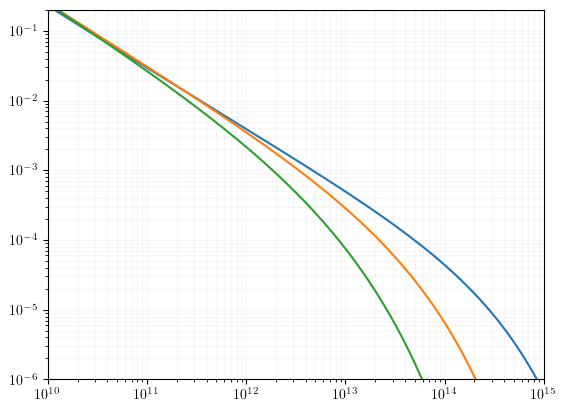

In [18]:
for z in [0,1,2]:
    dndlnm = get_hmf_at_z_and_m(z,m,params_values_dict = cosmo_params)
    plt.plot(m,dndlnm)
plt.loglog()
plt.grid(which='both',alpha=0.1)
plt.ylim(1e-6,2e-1)
plt.xlim(1e10,1e15)

## Gradient

In [19]:
z = 0.1
Omega_c = 0.26
m = jnp.geomspace(1e10,1e15,200)

def dndlnm_allms(Omega_c):
    omega_cdm = Omega_c*(cosmo_params['H0']/100.)**2
    cosmo_params.update({'omega_cdm':omega_cdm})
    dndlnm = get_hmf_at_z_and_m(z,m,cosmo_params)
    return dndlnm

In [20]:
from jax import jacfwd

In [21]:
%%time
ddndlnm_allms = jacfwd(dndlnm_allms,argnums=(0))

CPU times: user 18 μs, sys: 1 μs, total: 19 μs
Wall time: 21.9 μs


In [22]:
%timeit -n 10 -r 5 ddndlnm_allms(Omega_c)

The slowest run took 8.03 times longer than the fastest. This could mean that an intermediate result is being cached.
187 ms ± 211 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


Text(0, 0.5, '$|\\partial \\mathrm{dndlnm}(k)/\\partial \\Omega_c|$')

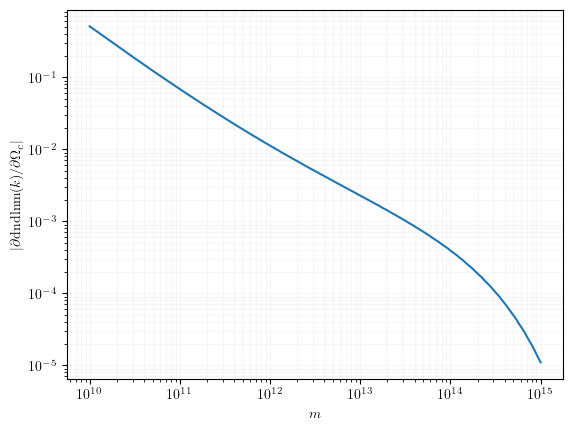

In [23]:
plt.loglog(m,jnp.abs(ddndlnm_allms(Omega_c)))
plt.grid(which = 'both',alpha=0.1)
plt.xlabel("$m$")
plt.ylabel(r"$|\partial \mathrm{dndlnm}(k)/\partial \Omega_c|$")